In [14]:
# === CELL 1: Install required packages ===seaborn
!pip install datasets pandas matplotlib seaborn missingno nltk --quiet

# Explanation:
# - datasets: for loading HuggingFace datasets
# - pandas: data manipulation
# - matplotlib & : plotting
# - missingno: visualize missing data
# - nltk: sentiment analysis


In [15]:
# === CELL 2: Import libraries ===
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datasets import load_dataset
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Explanation:
# Importing all necessary libraries for visualization, analysis, and sentiment


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [16]:
# === CELL 3: Load your dataset ===
dataset = load_dataset("ailsntua/QEvasion")  # Replace with your actual dataset path if local
train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# Quick look at the data
train_df.head()

# Explanation:
# Converts HuggingFace DatasetDict into pandas DataFrame for easier analysis

,title,date,president,url,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,annotator_id,annotator1,annotator2,annotator3,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label
0,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,How would you respond to the accusation that t...,85,None,None,None,False,False,False,0,Clear Reply,Explicit
1,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,1,Q. Of the Biden administration. And accused th...,"Well, look, first of all, theI am sincere abou...",The question consists of 2 parts: \n1. How wou...,Question part: 1. How would you respond to the...,Do you think President Xi is being sincere abo...,85,None,None,None,False,False,False,1,Ambivalent,General
2,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Do you believe the country's slowdown and gro...,85,None,None,None,False,False,False,2,Ambivalent,Partial/half-answer
3,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,2,Q. No worries. Do you believe the country's sl...,"Look, I think China has a difficult economic p...",The question consists of two parts:\n\n1. Q1: ...,Question part: Q1 - Do you believe the country...,Are you worried about the meeting between Pre...,85,None,None,None,False,False,False,3,Ambivalent,Dodging
4,"The President's News Conference in Hanoi, Vietnam","September 10, 2023",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,3,"Q. I can imagine. It is evening, I'd like to r...","Well, I hope I get to see Mr. Xi sooner than l...",The question consists of 3 parts:\n1. Is the P...,Question part: 1. Is the President's engagemen...,Is the President's engagement with Asian coun...,85,None,None,None,False,False,False,4,Clear Reply,Explicit


/tmp/ipython-input-2224939311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x=clarity_counts.index, y=clarity_counts.values, palette="coolwarm")


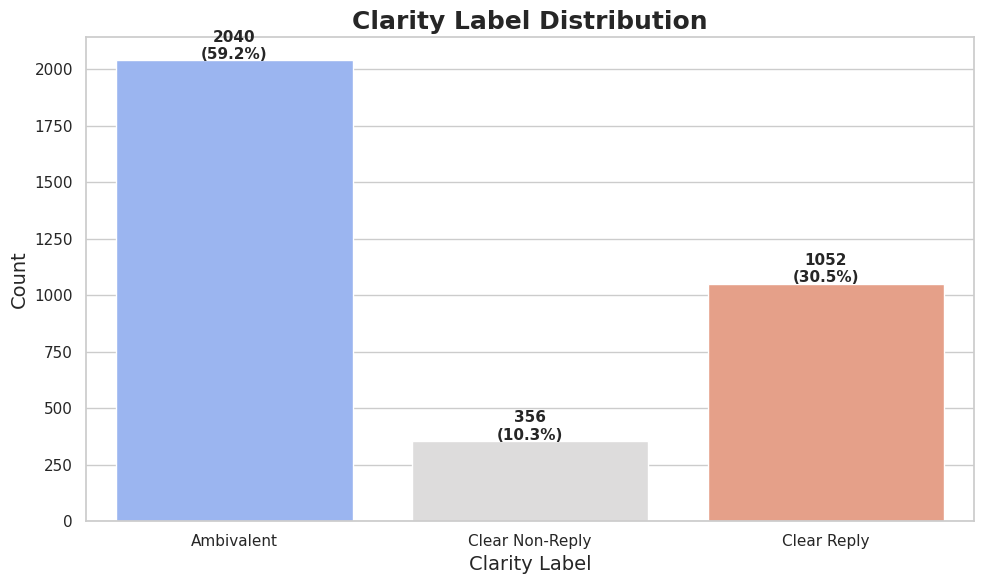

/tmp/ipython-input-2224939311.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x=evasion_counts.values, y=evasion_counts.index, palette="Spectral")


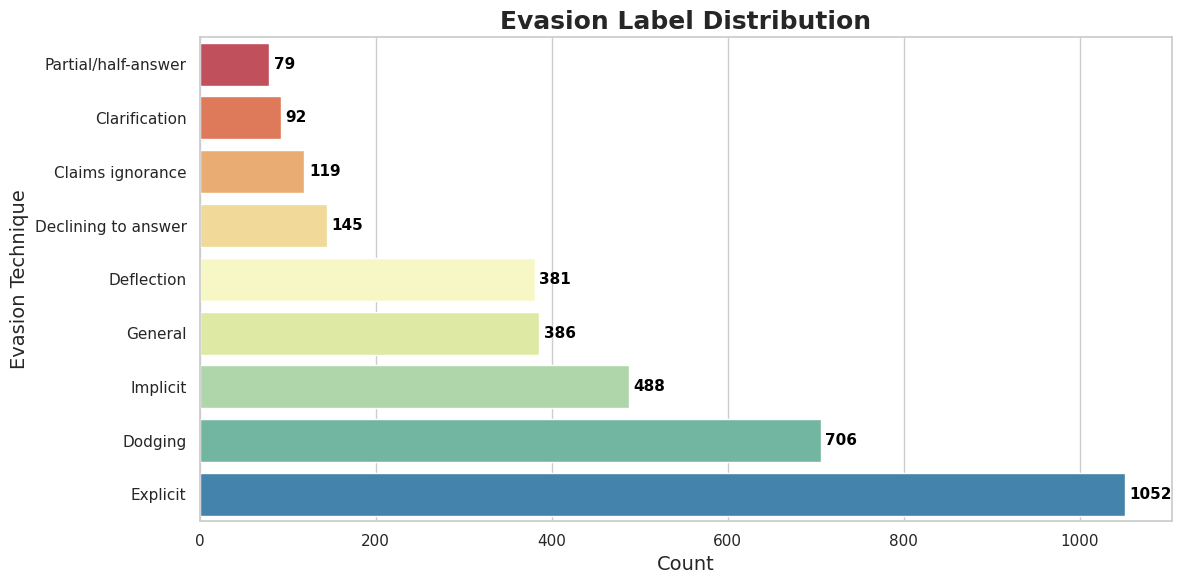

In [25]:
sns.set_theme(style="whitegrid", palette="pastel")

# ----- Clarity Label Distribution -----
plt.figure(figsize=(10,6))
clarity_counts = train_df['clarity_label'].value_counts().sort_index()
ax1 = sns.barplot(x=clarity_counts.index, y=clarity_counts.values, palette="coolwarm")
plt.title("Clarity Label Distribution", fontsize=18, weight='bold')
plt.xlabel("Clarity Label", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Add counts and percentages on top of bars
for i, v in enumerate(clarity_counts.values):
    ax1.text(i, v + 5, f"{v}\n({v/train_df.shape[0]*100:.1f}%)", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# ----- Evasion Label Distribution -----
plt.figure(figsize=(12,6))
evasion_counts = train_df['evasion_label'].value_counts().sort_values(ascending=True)
ax2 = sns.barplot(x=evasion_counts.values, y=evasion_counts.index, palette="Spectral")
plt.title("Evasion Label Distribution", fontsize=18, weight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Evasion Technique", fontsize=14)

# Add counts on bars
for i, v in enumerate(evasion_counts.values):
    ax2.text(v + 5, i, f"{v}", color='black', va='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# Explanation:
# Shows how balanced your dataset is across clarity and evasion labels

<Figure size 1200x600 with 0 Axes>

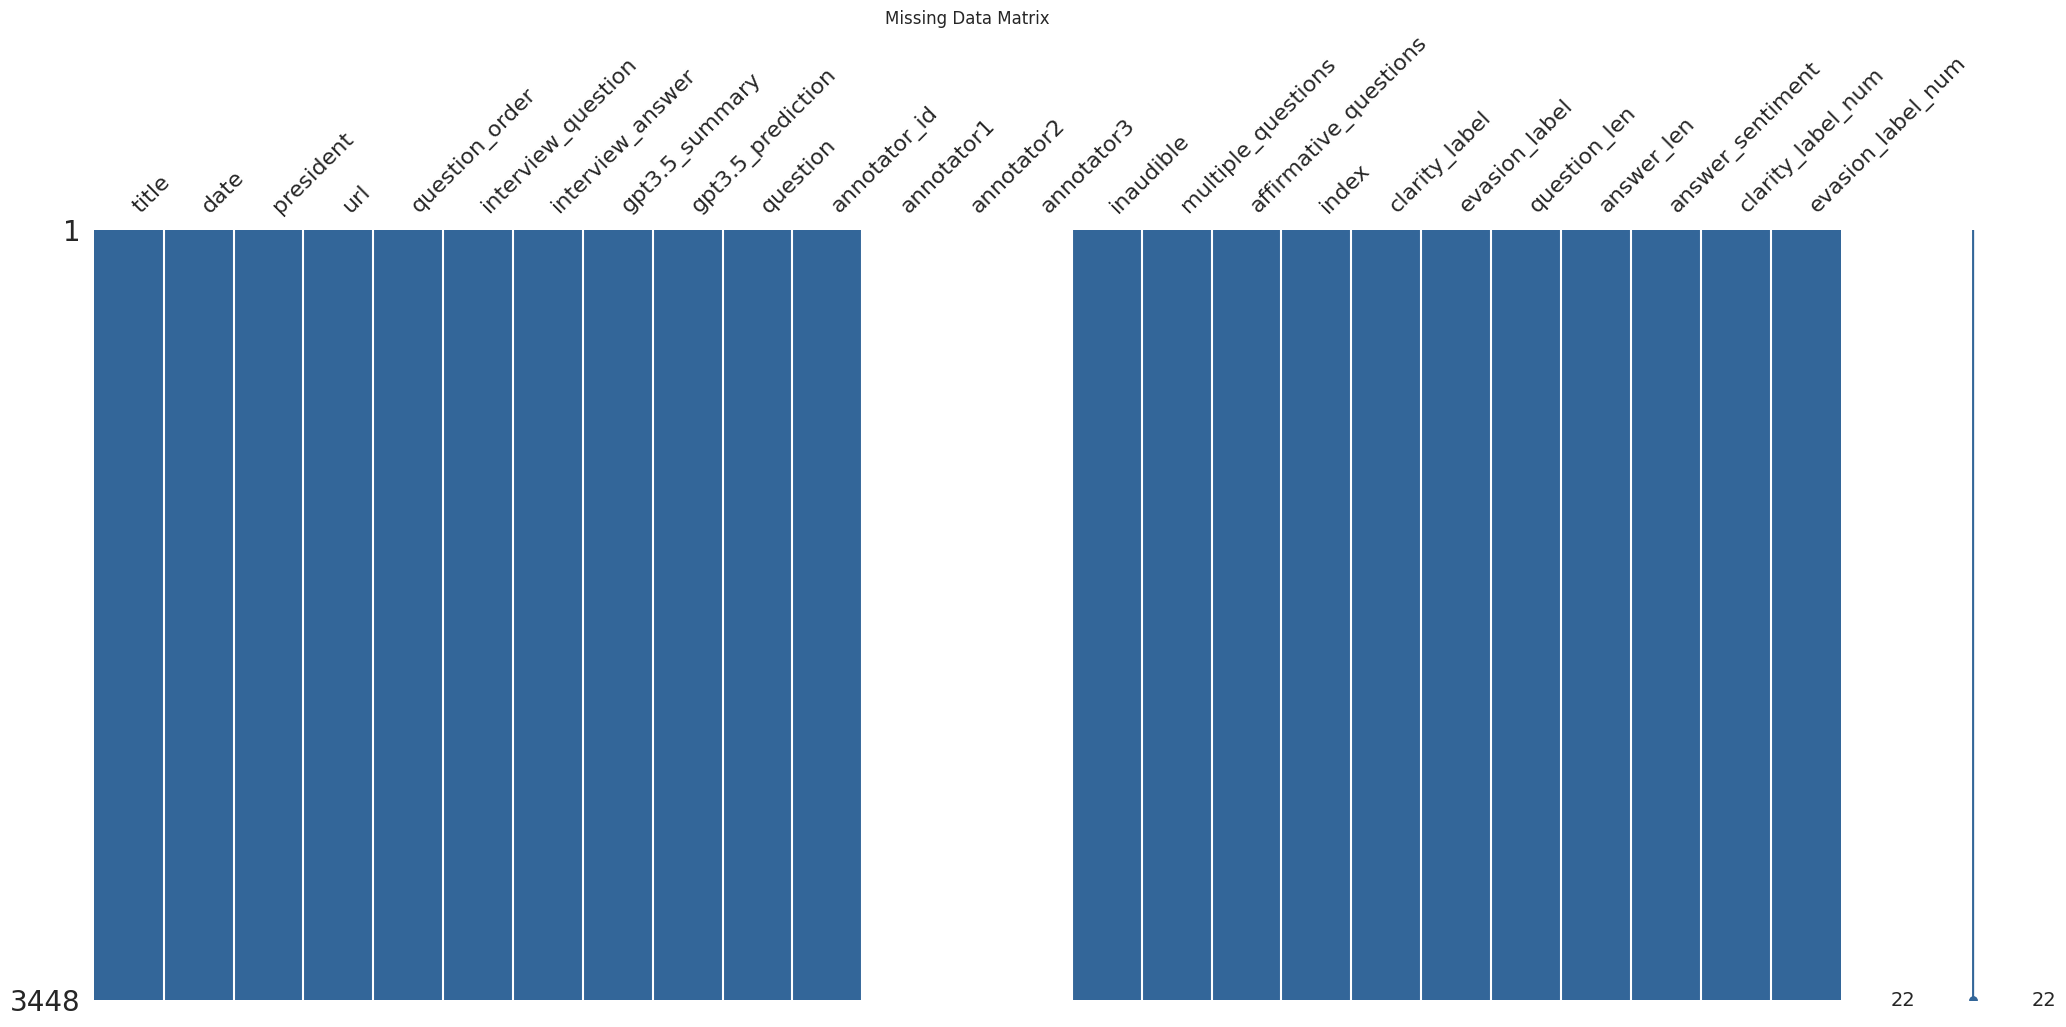

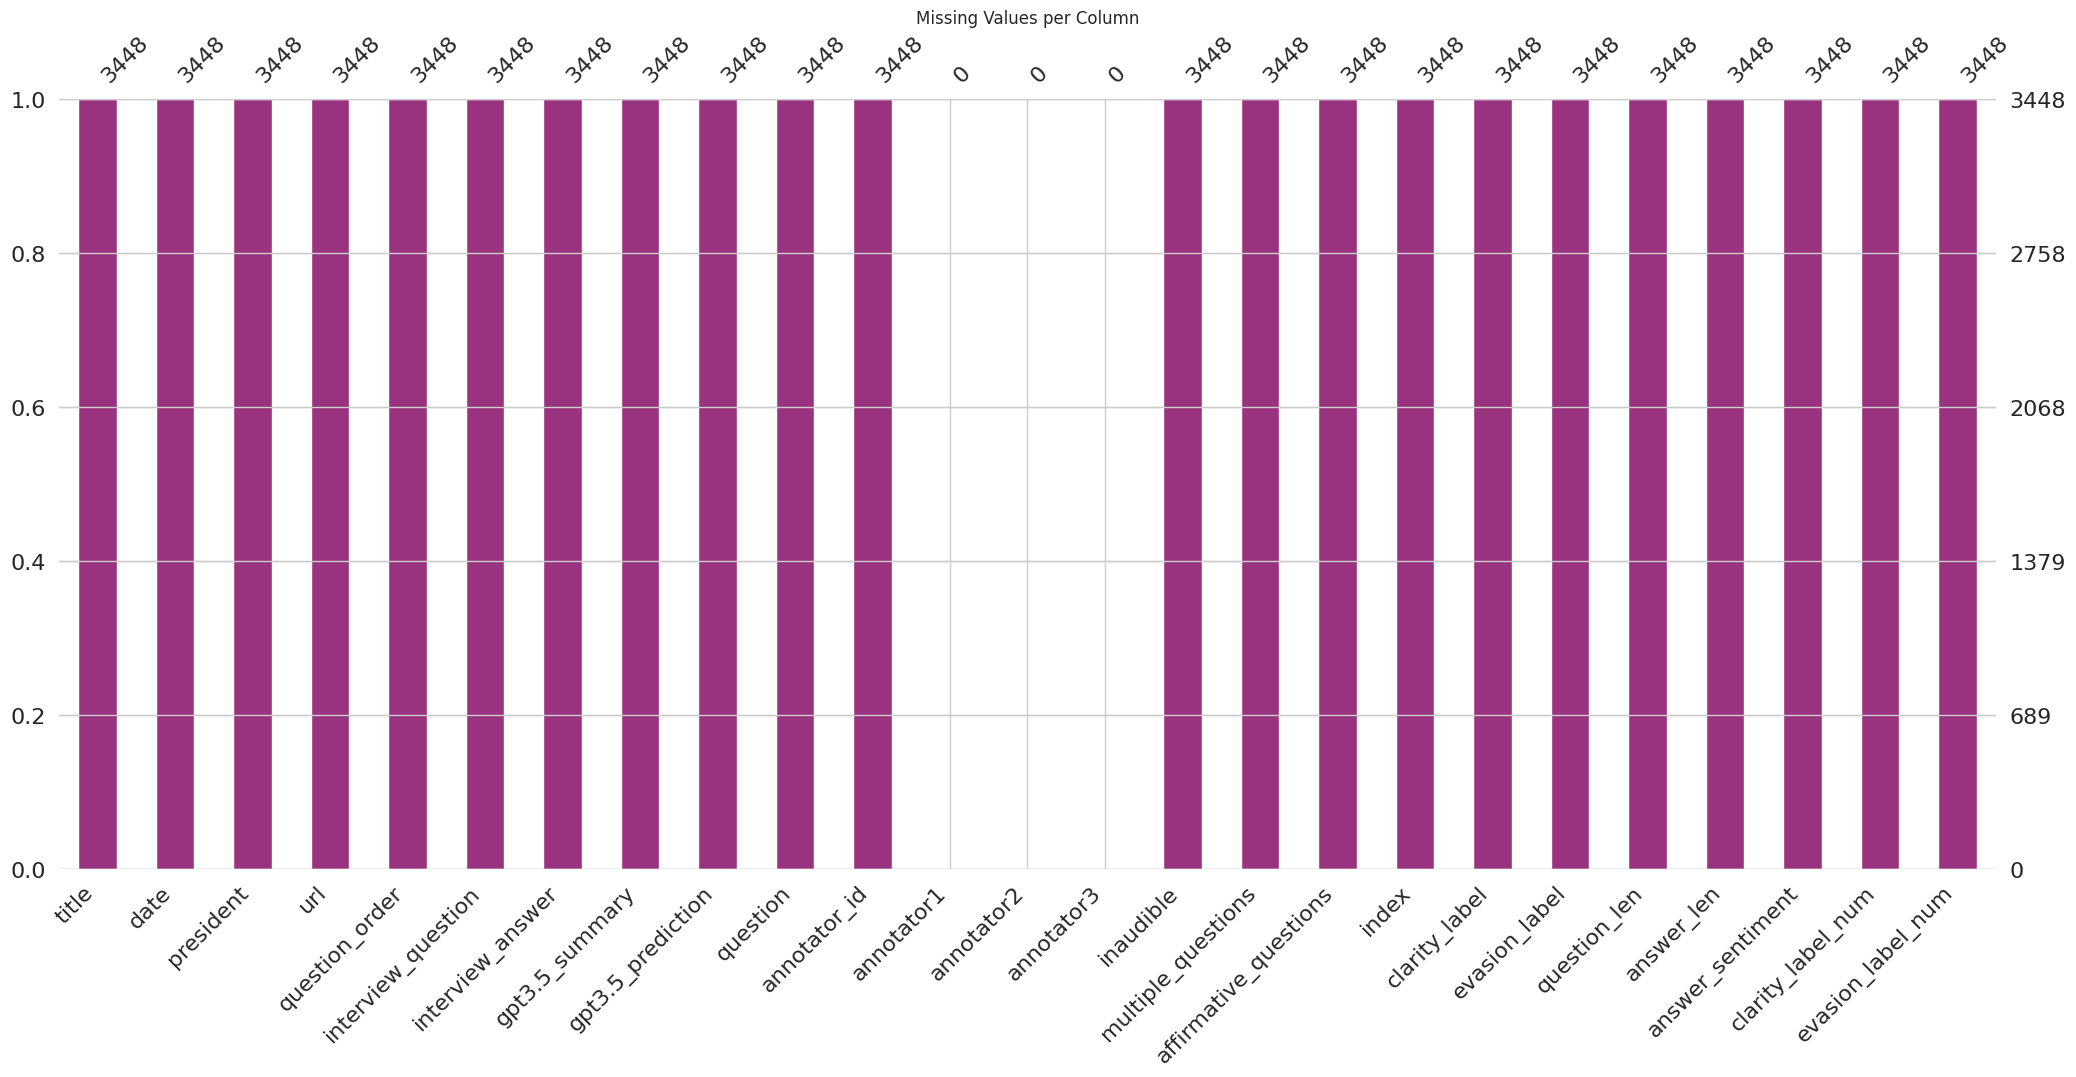

/tmp/ipython-input-1789358763.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="coolwarm")


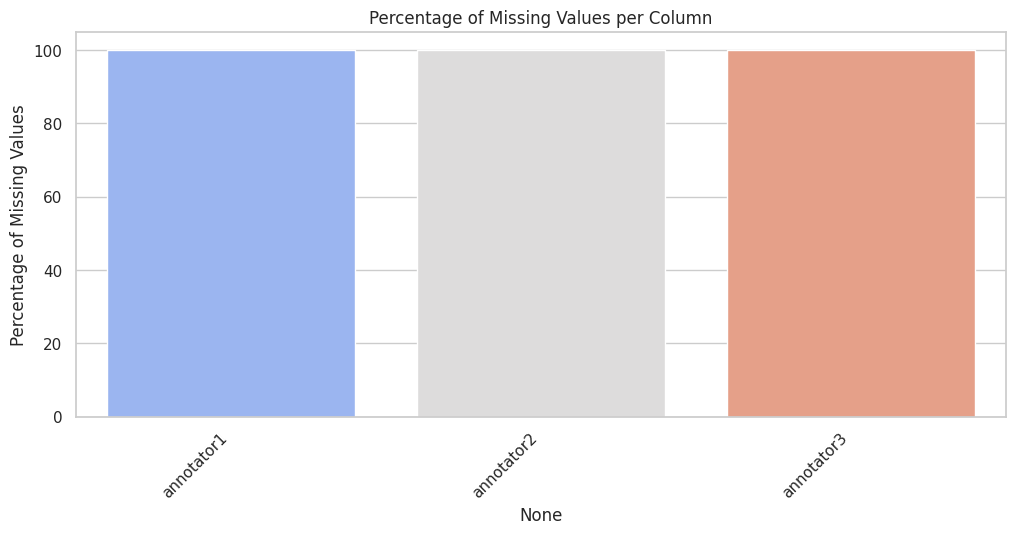

In [26]:
# === CELL 5: Missing Data Visualization ===
import missingno as msno

# 1. Matrix view (basic)
plt.figure(figsize=(12,6))
msno.matrix(train_df, color=(0.2, 0.4, 0.6))
plt.title("Missing Data Matrix")
plt.show()

# 2. Bar plot showing total missing values per column
plt.figure(figsize=(12,6))
msno.bar(train_df, color=(0.6, 0.2, 0.5))
plt.title("Missing Values per Column")
plt.show()

# 3. Missing value percentages
missing_percent = train_df.isnull().mean() * 100
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)
if not missing_percent.empty:
    plt.figure(figsize=(12,5))
    sns.barplot(x=missing_percent.index, y=missing_percent.values, palette="coolwarm")
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Percentage of Missing Values")
    plt.title("Percentage of Missing Values per Column")
    plt.show()
else:
    print("No missing values in the dataset!")

# Explanation:
# - Matrix view gives a quick overview of missing patterns.
# - Bar plots show the absolute and relative missing counts.
# - This helps decide which columns need imputation or can be dropped.


In [19]:
# === CELL 6: Check for short/noisy answers ===
short_answers = train_df[train_df['interview_answer'].str.split().apply(len) < 3]
print("Number of very short answers:", len(short_answers))
short_answers.sample(5)

# Explanation:
# Short answers are often noise; we can inspect or decide to remove them

Number of very short answers: 121


,title,date,president,url,question_order,interview_question,interview_answer,gpt3.5_summary,gpt3.5_prediction,question,annotator_id,annotator1,annotator2,annotator3,inaudible,multiple_questions,affirmative_questions,index,clarity_label,evasion_label
1833,"The President's News Conference in Hangzhou, C...","September 05, 2016",Barack Obama,https://www.presidency.ucsb.edu/documents/the-...,4,"Q. Thank you, Mr. President. The G-20 group to...",Yes.,The question consists of 2 parts:\n\n1. How mu...,Question part: 1 - How much of the G-20 discus...,How does the President balance efforts for gl...,89,None,None,None,False,False,False,1833,Ambivalent,Dodging
298,"The President's News Conference in Geneva, Swi...","June 16, 2021",Joseph R. Biden,https://www.presidency.ucsb.edu/documents/the-...,4,"Q. Thank you, Mr. President. Is there a partic...",Yes.,The question consists of 2 parts: \n\n1. Reaso...,Question part: 1 - Reasons for the shortened d...,Agreement with President Putin's statement reg...,86,None,None,None,False,False,True,298,Clear Reply,Explicit
1230,"The President's News Conference in Washington,...","November 07, 2018",Donald J. Trump,https://www.presidency.ucsb.edu/documents/the-...,8,Q. ——but the question—but you didn't answer my...,I'm not.,The question consists of 1 part: \n\n1. Why ar...,Question part: 1 - Why are you pitting America...,Why are you pitting Americans against one anot...,86,None,None,None,False,False,False,1230,Ambivalent,Dodging
3013,The President's News Conference With Prime Min...,"January 09, 2008",George W. Bush,https://www.presidency.ucsb.edu/documents/the-...,3,"Q. Mr. President, regarding the issues of rock...",Yes.[],The question consists of 4 parts:\n\n1. Regard...,Question part: 1. Regarding the issues of rock...,Regarding the issues of rockets and settlement...,85,None,None,None,False,False,False,3013,Ambivalent,Dodging
1352,"The President's News Conference in Washington,...","November 07, 2018",Donald J. Trump,https://www.presidency.ucsb.edu/documents/the-...,45,"Q. Mr. President, why can't you do that while ...",Excuse me?Bipartisanship/,The question consists of 1 part:\n\n1. Why can...,Question part: 1. Why can't you do that while ...,Why can't you do that while subpoenas are comi...,89,None,None,None,False,False,False,1352,Clear Non-Reply,Clarification


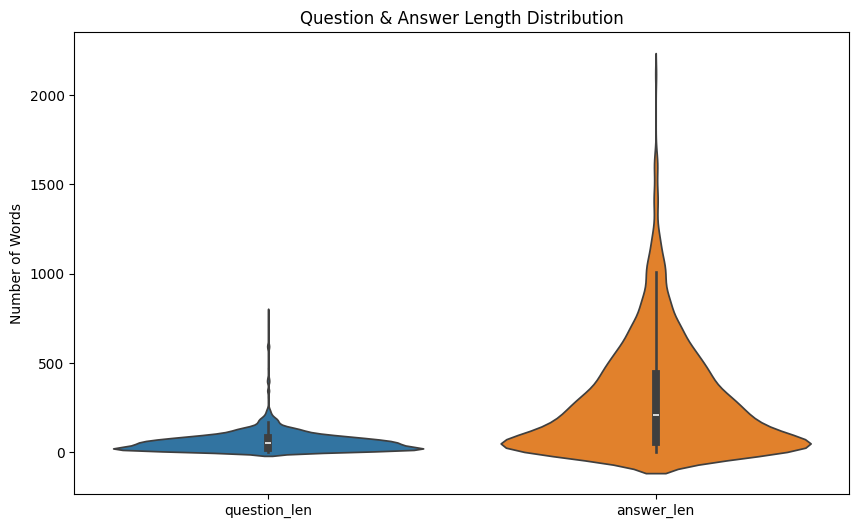

In [20]:
# === CELL 7: Question and answer lengths ===
train_df['question_len'] = train_df['interview_question'].str.split().apply(len)
train_df['answer_len'] = train_df['interview_answer'].str.split().apply(len)

plt.figure(figsize=(10,6))
sns.violinplot(data=train_df[['question_len','answer_len']])
plt.title("Question & Answer Length Distribution")
plt.ylabel("Number of Words")
plt.show()

# Explanation:
# Violin plots show distribution of lengths for questions and answers


/tmp/ipython-input-1723286249.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='clarity_label', y='answer_sentiment', data=train_df, palette="Set2", inner=None)


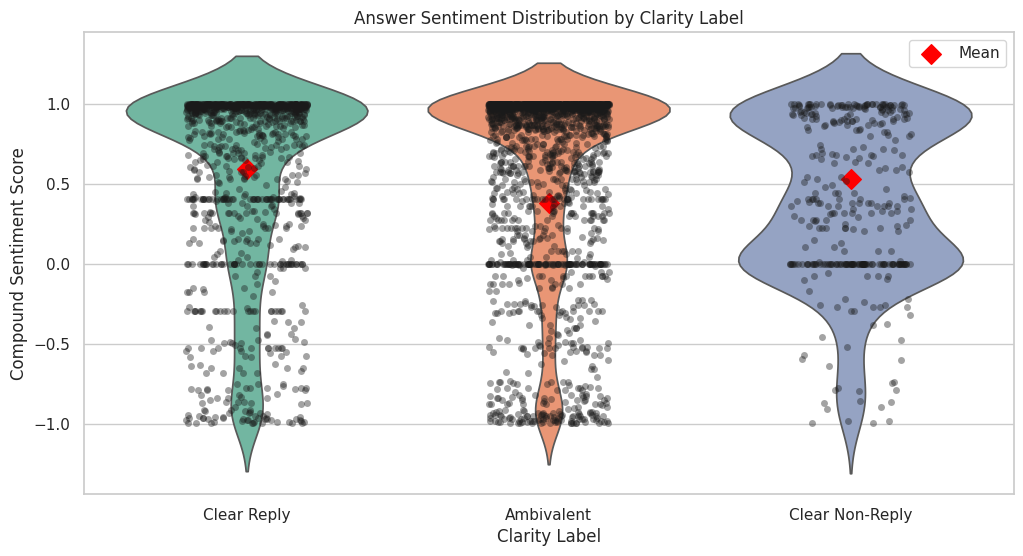

In [27]:
# === CELL 8: Sentiment Analysis by Clarity Label ===
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()
train_df['answer_sentiment'] = train_df['interview_answer'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

plt.figure(figsize=(12,6))

# Violin plot to show distribution
sns.violinplot(x='clarity_label', y='answer_sentiment', data=train_df, palette="Set2", inner=None)

# Overlay individual points for more detail
sns.stripplot(x='clarity_label', y='answer_sentiment', data=train_df, color='k', alpha=0.4, jitter=0.2)

# Optional: Add mean markers
means = train_df.groupby('clarity_label')['answer_sentiment'].mean().values
for i, m in enumerate(means):
    plt.scatter(i, m, color='red', marker='D', s=100, label='Mean' if i==0 else "")

plt.title("Answer Sentiment Distribution by Clarity Label")
plt.ylabel("Compound Sentiment Score")
plt.xlabel("Clarity Label")
plt.legend()
plt.show()

# Explanation:
# - Violin plot shows full distribution of sentiments for each label.
# - Stripplot adds individual answer points for detail.
# - Red diamonds indicate mean sentiment, helping spot trends.
# - This gives better insight into whether sentiment differs for clear vs evasive answers.

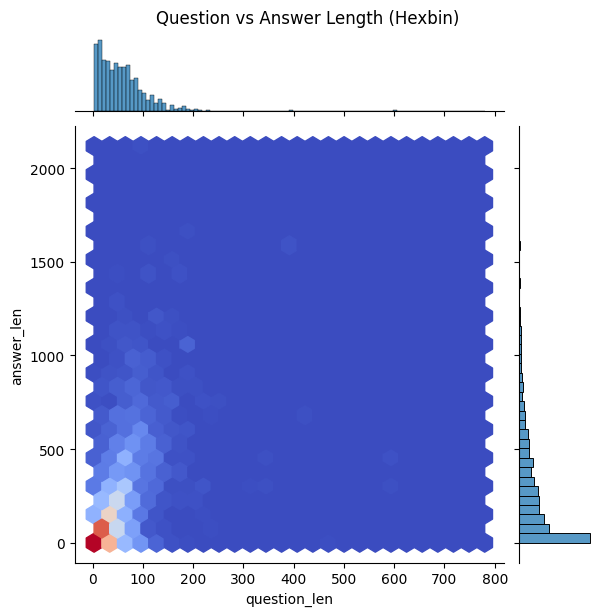

In [22]:
# === CELL 9: Question vs Answer length alignment ===
sns.jointplot(x='question_len', y='answer_len', data=train_df, kind='hex', gridsize=25, cmap='coolwarm')
plt.suptitle("Question vs Answer Length (Hexbin)", y=1.02)
plt.show()

# Explanation:
# Hexbin plot highlights multimodal alignment: are long questions leading to long answers?

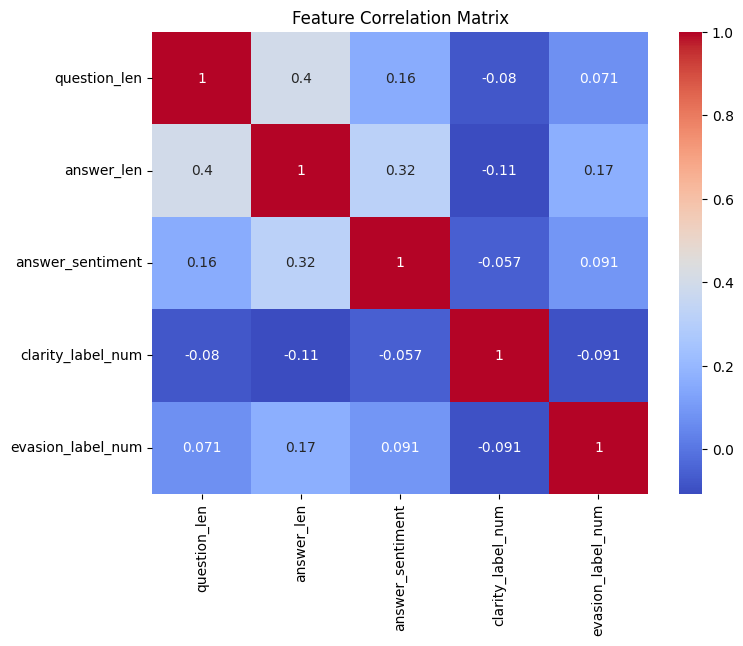

In [23]:
# === CELL 10: Correlation heatmap ===
train_df['clarity_label_num'] = train_df['clarity_label'].astype('category').cat.codes
train_df['evasion_label_num'] = train_df['evasion_label'].astype('category').cat.codes

corr = train_df[['question_len','answer_len','answer_sentiment','clarity_label_num','evasion_label_num']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Explanation:
# Quickly see how features relate to each other and to the labels

In [28]:
# === CELL 11: Save all plots as separate PDFs (overwrite if exists) ===
import os
from matplotlib.backends.backend_pdf import PdfPages

# Optional: specify a folder to save PDFs
save_folder = "plots_pdf"
os.makedirs(save_folder, exist_ok=True)  # creates folder if it doesn't exist

# Helper function to save a figure as PDF
def save_pdf(filename):
    return PdfPages(os.path.join(save_folder, filename))

# 1. Clarity label distribution
with save_pdf("clarity_label_distribution.pdf") as pdf:
    plt.figure(figsize=(8,6))
    sns.countplot(x='clarity_label', data=train_df)
    plt.title("Clarity Label Distribution")
    pdf.savefig()
    plt.close()

# 2. Evasion label distribution
with save_pdf("evasion_label_distribution.pdf") as pdf:
    plt.figure(figsize=(8,6))
    sns.countplot(x='evasion_label', data=train_df)
    plt.title("Evasion Label Distribution")
    pdf.savefig()
    plt.close()

# 3. Missing data visualization
with save_pdf("missing_data_matrix.pdf") as pdf:
    plt.figure(figsize=(12,6))
    msno.matrix(train_df)
    pdf.savefig()
    plt.close()

# 4. Question & Answer lengths
with save_pdf("question_answer_lengths.pdf") as pdf:
    plt.figure(figsize=(10,6))
    sns.violinplot(data=train_df[['question_len','answer_len']], palette="Set3")
    plt.title("Question & Answer Length Distribution")
    pdf.savefig()
    plt.close()

# 5. Enhanced Sentiment distribution by clarity label
with save_pdf("sentiment_by_clarity.pdf") as pdf:
    plt.figure(figsize=(12,6))
    sns.violinplot(x='clarity_label', y='answer_sentiment', data=train_df, palette="Set2", inner=None)
    sns.stripplot(x='clarity_label', y='answer_sentiment', data=train_df, color='k', alpha=0.4, jitter=0.2)
    means = train_df.groupby('clarity_label')['answer_sentiment'].mean().values
    for i, m in enumerate(means):
        plt.scatter(i, m, color='red', marker='D', s=100, label='Mean' if i==0 else "")
    plt.title("Answer Sentiment Distribution by Clarity Label")
    plt.ylabel("Compound Sentiment Score")
    plt.xlabel("Clarity Label")
    plt.legend()
    pdf.savefig()
    plt.close()

# 6. Question vs Answer Length Hexbin
with save_pdf("question_answer_hexbin.pdf") as pdf:
    g = sns.jointplot(x='question_len', y='answer_len', data=train_df, kind='hex', gridsize=25, cmap='coolwarm')
    g.fig.suptitle("Question vs Answer Length (Hexbin)", y=1.02)
    pdf.savefig()
    plt.close()

# 7. Correlation heatmap
with save_pdf("correlation_matrix.pdf") as pdf:
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Feature Correlation Matrix")
    pdf.savefig()
    plt.close()

print(f"All plots saved as separate PDFs in folder '{save_folder}'.")


/tmp/ipython-input-3413012630.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='clarity_label', y='answer_sentiment', data=train_df, palette="Set2", inner=None)


All plots saved as separate PDFs in folder 'plots_pdf'.


<Figure size 1200x600 with 0 Axes>